In [8]:
import pandas as pd

In [9]:
dataset = pd.read_csv("insurance.csv")

In [10]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# para deixar todas as saídas com os mesmos valores
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [12]:
dataset.shape

(1338, 7)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

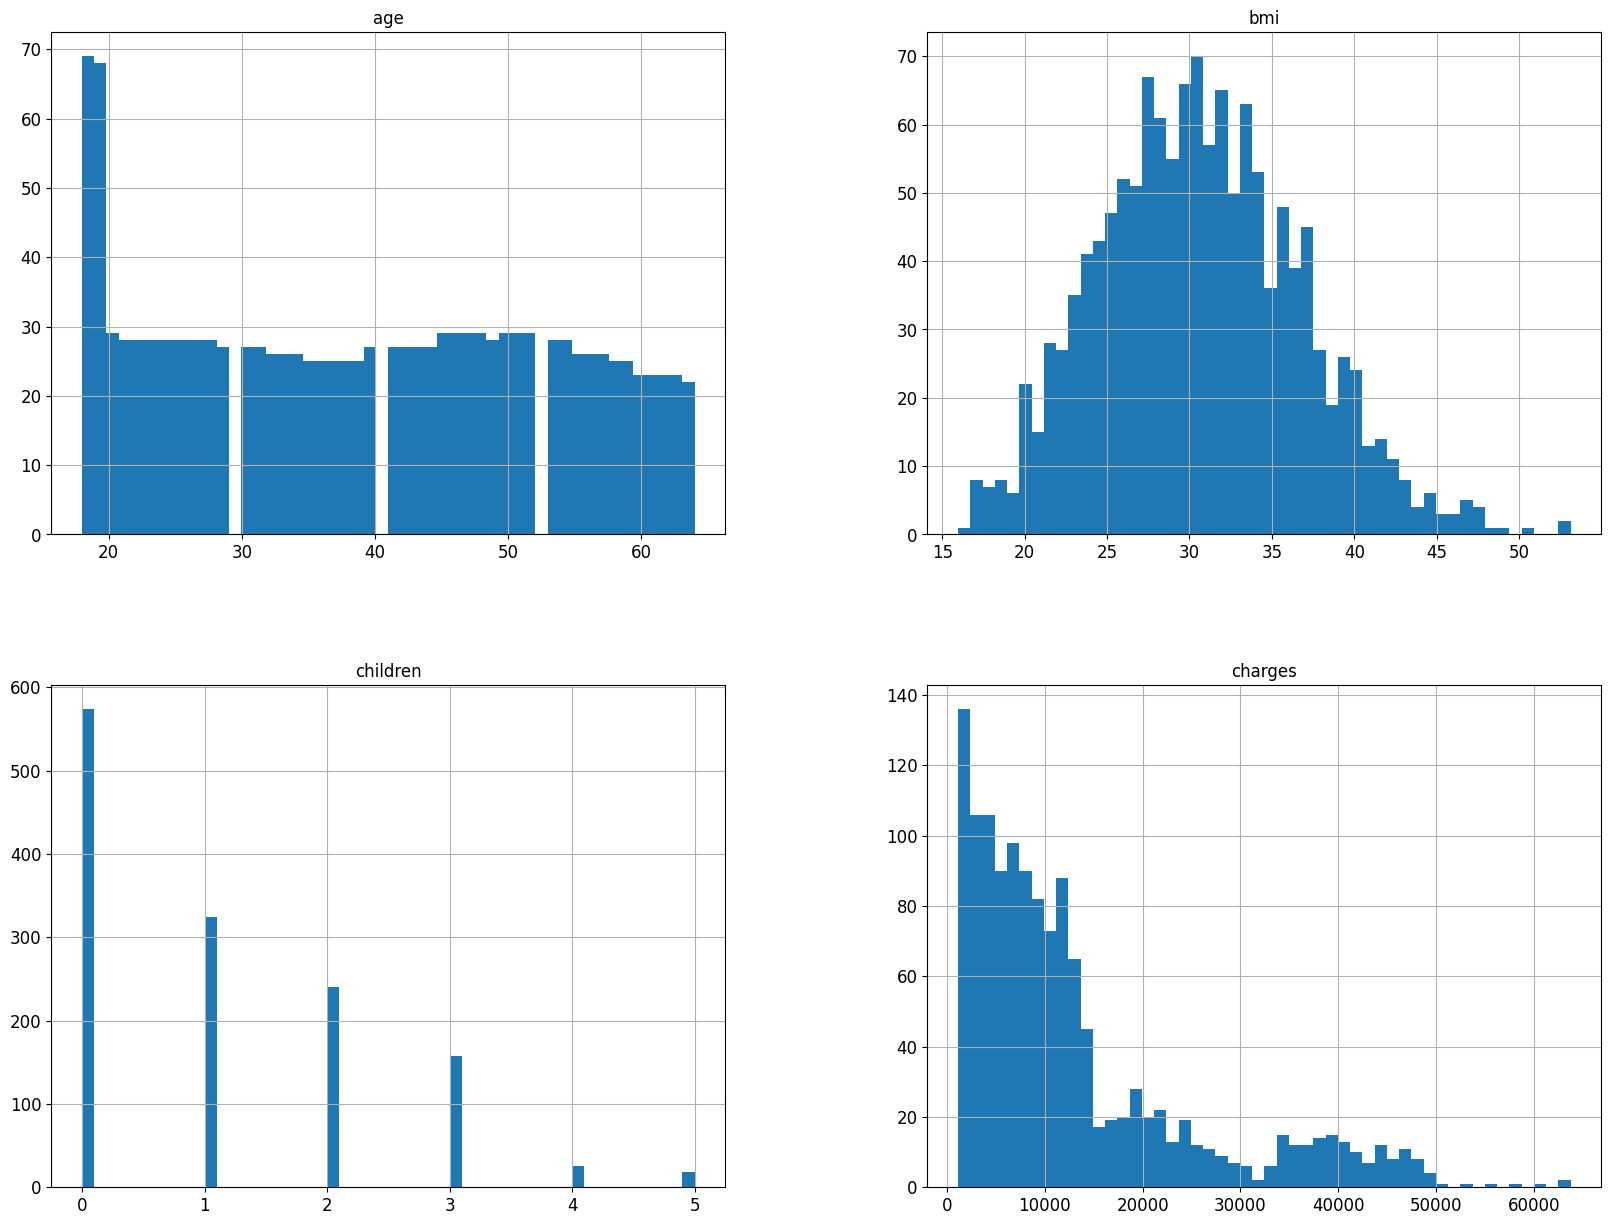

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

In [14]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)

In [15]:
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


In [16]:
df_train["sex"].value_counts()

sex
male      539
female    531
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_train["sex"] = ordinal_encoder.fit_transform(df_train.sex.values.reshape(-1,1))

df_train["sex"].value_counts()

sex
1.0    539
0.0    531
Name: count, dtype: int64

In [18]:
df_train["smoker"].value_counts()

smoker
no     848
yes    222
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_train["smoker"] = ordinal_encoder.fit_transform(df_train.smoker.values.reshape(-1,1))

df_train["smoker"].value_counts()

smoker
0.0    848
1.0    222
Name: count, dtype: int64

In [20]:
df_train_num = df_train.drop('region', axis=1)

In [21]:
df_train_num.head()

,age,sex,bmi,children,smoker,charges
1317,18,1.0,53.13,0,0.0,1163.4627
794,39,0.0,31.92,2,0.0,7209.4918
680,21,0.0,17.40,1,0.0,2585.2690
795,27,1.0,28.50,0,1.0,18310.7420
887,36,0.0,30.02,0,0.0,5272.1758


In [22]:
corr_matrix = df_train_num.corr()

In [ ]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.782306
age         0.282692
bmi         0.203656
children    0.053542
sex         0.052754
Name: charges, dtype: float64

(-1.0, 2.0, 0.0, 60000.0)

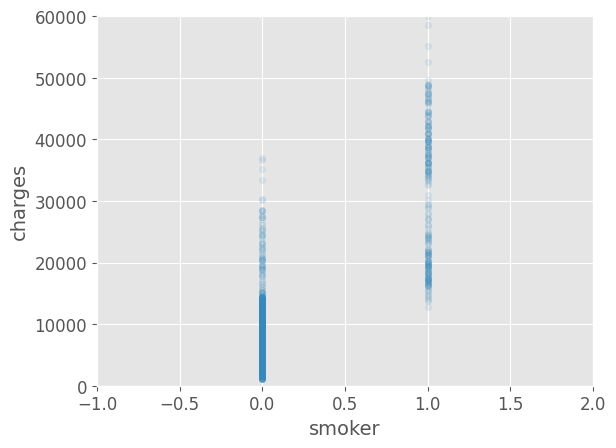

In [ ]:
df_train_num.plot(kind="scatter", x="smoker", y="charges",
             alpha=0.1)
plt.axis([-1, 2, 0, 60000])

(-1.0, 6.0, 0.0, 60000.0)

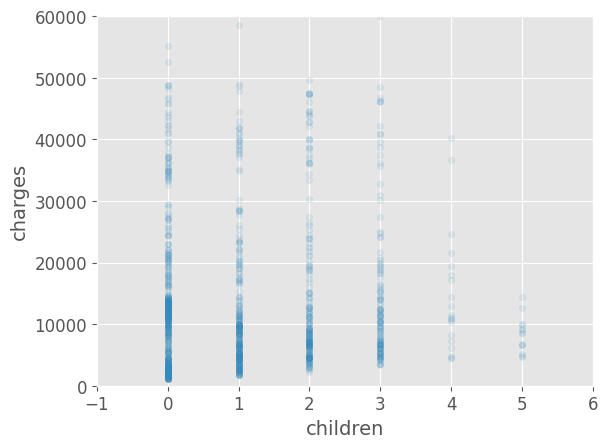

In [ ]:
df_train_num.plot(kind="scatter", x="children", y="charges",
             alpha=0.1)
plt.axis([-1, 6, 0, 60000])

(-1.0, 2.0, 0.0, 60000.0)

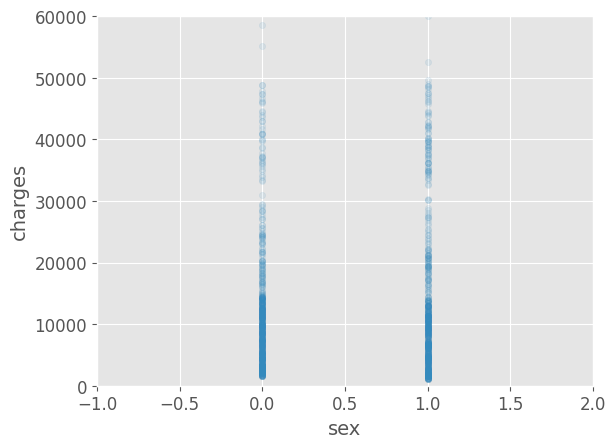

In [ ]:
df_train_num.plot(kind="scatter", x="sex", y="charges",
             alpha=0.1)
plt.axis([-1, 2, 0, 60000])

(0.0, 100.0, 0.0, 60000.0)

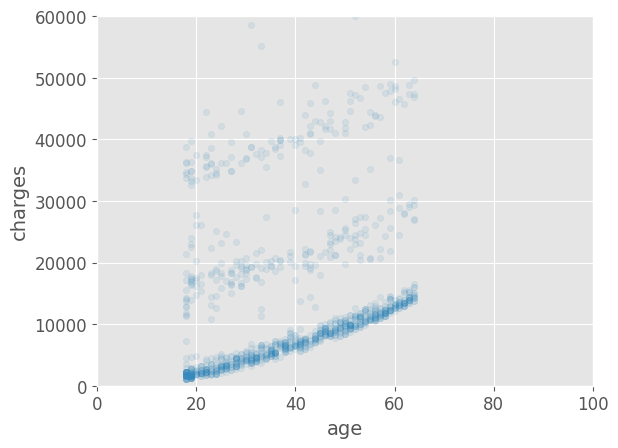

In [ ]:
df_train_num.plot(kind="scatter", x="age", y="charges",
             alpha=0.1)
plt.axis([0, 100, 0, 60000])

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["smoker"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [24]:
strat_test_set["smoker"].value_counts() / len(strat_test_set)

smoker
no     0.794776
yes    0.205224
Name: count, dtype: float64

In [25]:
strat_train_set["smoker"].value_counts() / len(strat_train_set)

smoker
no     0.795327
yes    0.204673
Name: count, dtype: float64

In [26]:
dataset["smoker"].value_counts() / len(dataset)

smoker
no     0.795217
yes    0.204783
Name: count, dtype: float64

In [27]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20


ordinal_encoder = OrdinalEncoder()
strat_train_set["smoker"] = ordinal_encoder.fit_transform(strat_train_set.smoker.values.reshape(-1,1))
strat_train_set["sex"] = ordinal_encoder.fit_transform(strat_train_set.sex.values.reshape(-1,1))

strat_test_set["smoker"] = ordinal_encoder.fit_transform(strat_test_set.smoker.values.reshape(-1,1))
strat_test_set["sex"] = ordinal_encoder.fit_transform(strat_test_set.sex.values.reshape(-1,1))

In [28]:
strat_train_set.head()

,age,sex,bmi,children,smoker,region,charges
294,25,1.0,26.800,3,0.0,southwest,3906.12700
179,41,0.0,33.155,3,0.0,northeast,8538.28845
1335,18,0.0,36.850,0,0.0,southeast,1629.83350
634,51,1.0,39.700,1,0.0,southwest,9391.34600
67,40,1.0,26.315,1,0.0,northwest,6389.37785


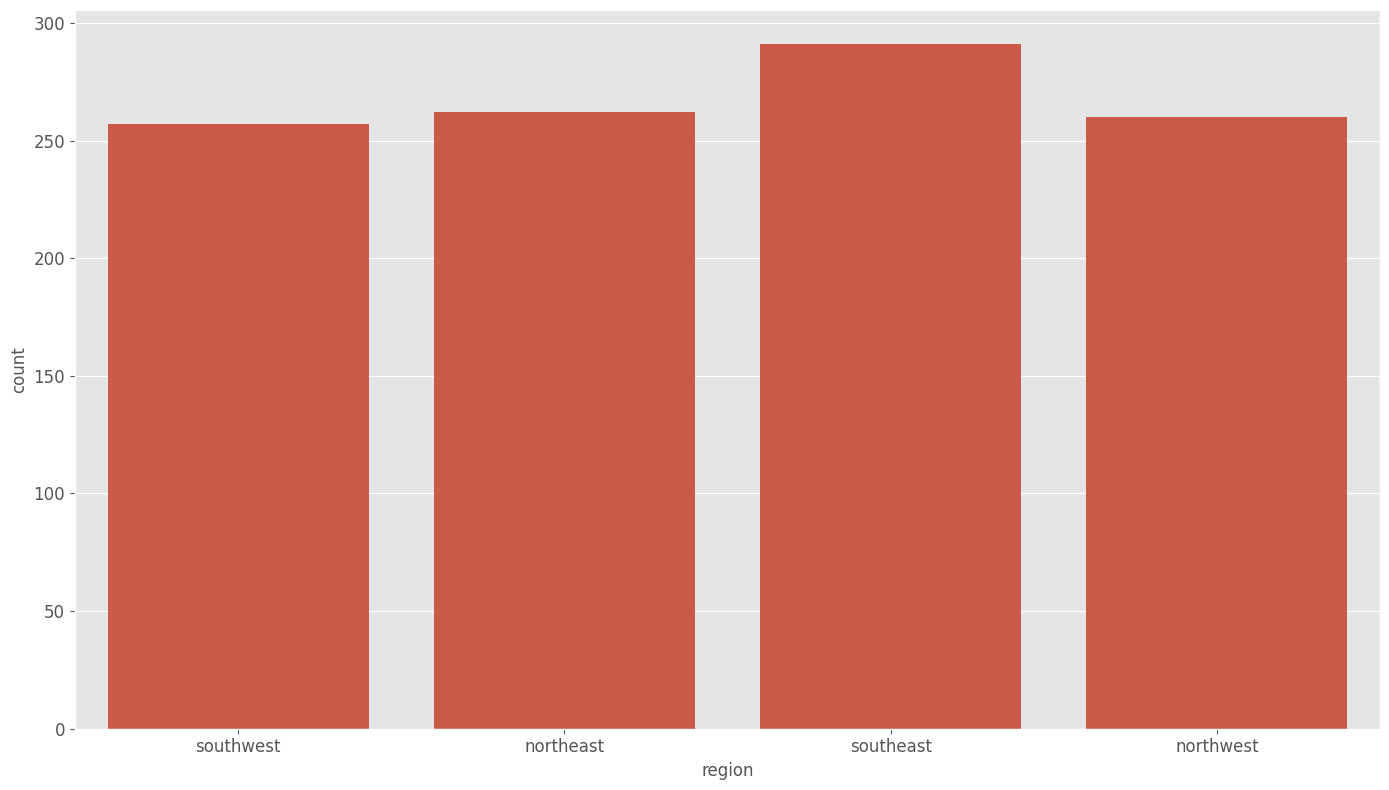

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, _ = plt.subplots(1, figsize=(14,8))
ax = sns.countplot(x="region", data=strat_train_set)
fig.tight_layout()

(-1.0, 4.0, 0.0, 60000.0)

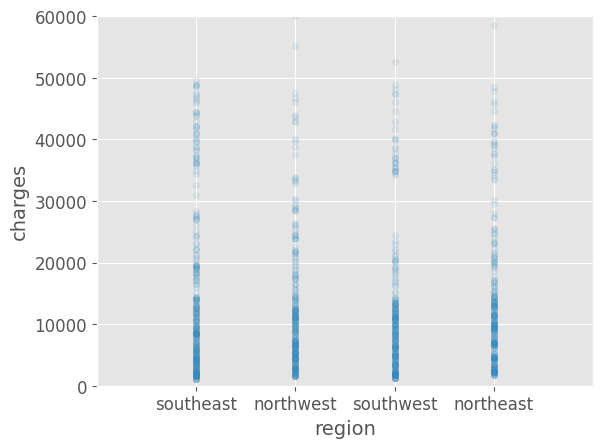

In [ ]:
strat_train_set.plot(kind="scatter", x="region", y="charges",
             alpha=0.1)
plt.axis([-1, 4, 0, 60000])

In [30]:
insurancing_train = strat_train_set.drop("charges", axis=1) # apagando a target para a base de treino (nosso x)
insurancing_train_labels = strat_train_set["charges"].copy()

insurancing_test = strat_test_set.drop("charges", axis=1) # apagando a target para a base de treino (nosso x)
insurancing_test_labels = strat_test_set["charges"].copy()

In [31]:
insurancing_train_num = insurancing_train.drop('region', axis=1)
insurancing_test_num = insurancing_test.drop('region', axis=1)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

In [33]:
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

from sklearn.compose import ColumnTransformer

num_attribs = list(insurancing_train_num)
cat_attribs = ["region"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

insurancing_train_prepared = full_pipeline.fit_transform(insurancing_train)


In [34]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

from sklearn.compose import ColumnTransformer

num_attribs = list(insurancing_test_num)
cat_attribs = ["region"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

insurancing_test_prepared = full_pipeline.fit_transform(insurancing_test)

In [35]:
insurancing_train_prepared.shape

(1070, 9)

In [ ]:
column_names = [
    'age', 'sex', 'bmi', 'children', 'smoker',
    'northeast', 'northwest', 'southeast', 'southwest']

# Transformar o array em DataFrame
insurancing_df = pd.DataFrame(data=insurancing_train_prepared, columns=column_names)

# Exibir o DataFrame resultante
print(insurancing_df.shape)

(1070, 9)


In [ ]:
insurancing_df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.007157,0.983317,-0.656649,1.565207,-0.507291,0.0,0.0,0.0,1.0
1,0.133146,-1.016966,0.394937,1.565207,-0.507291,1.0,0.0,0.0,0.0
2,-1.506040,-1.016966,1.006363,-0.914712,-0.507291,0.0,0.0,1.0,0.0
3,0.845836,0.983317,1.477964,-0.088072,-0.507291,0.0,0.0,0.0,1.0
4,0.061877,0.983317,-0.736904,-0.088072,-0.507291,0.0,1.0,0.0,0.0


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(insurancing_train_prepared, insurancing_train_labels)

DecisionTreeRegressor(max_depth=10)

In [37]:
model_dtr.predict(insurancing_train_prepared)

predictioons_tree = model_dtr.predict(insurancing_test_prepared)

print("Predictions:", predictioons_tree)

Predictions: [ 9222.4026      4776.05959553 13533.7403      5945.57845
 24059.68019     4168.82791429 46255.1125      2731.9122
 21223.6758      2357.91830833  6182.67560833  8823.98575
 11252.76402955  1834.6655     15006.57945     3910.35967452
  2997.064485    3925.7582     23484.788875   13516.01528375
 11574.47891667  2357.91830833 11826.745845   11574.47891667
  7928.48289    13470.86        4437.86723529  5469.0066
 12477.95646667 15612.19335    36704.846       8854.791175
 13222.970725   10358.61835    39611.7577     19770.95805
 12939.8421375   4776.05959553  7958.695008    5280.15121
 13344.98842     3910.35967452  9174.13565     1769.53165
 12837.5059     43867.5249      6167.686275   11841.21585
  6167.686275    1906.35825    19594.80965    10264.4421
 10064.720558   16340.05208     9724.53       13121.927025
  3481.868       2136.4861      1969.614      11175.23461
  3260.643175    7420.336225    2997.064485    8854.791175
  8503.01825    26125.67477     4776.05959553  397

In [38]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

lin_mse = mean_squared_error(insurancing_test_labels, predictioons_tree)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

5411.252026633668

In [39]:
from sklearn.metrics import r2_score

r2 = r2_score(insurancing_test_labels, predictioons_tree)
print('r²',r2)

# quanto mais proximo de 1 melhor o resultado, mas nao pode ser muito proximo de 1 pois seria um caso de overfitting


r² 0.8015248247979291
